# Modelagem e Identificação de Sistemas 

[Slides da aula](https://marofe.github.io/controle-digital/2024/aula6.html)

### Questão 1

Nessa atividade o objetivo é verificar o erro em regime permanente para sistemas em tempo discreto.

Para isso, considere a seguinte função de transferência como exemplo:

$$
G(z) = \frac{z}{(z - 1)(1.2706z - 0.7706)}
$$

O seguinte código em Matlab apresenta um exemplo para fazer o gráfico da resposta ao degrau, rampa e parábola do sistema usando `lsim`:

```matlab
%% Resposta ao degrau
td = 0:T:100; % vetor de tempo discreto
y1 = step(Gf, td); % resposta ao degrau
figure(1)
stairs(td, y1, 'LineWidth', 2);
hold on
line([0 20], [1 1], 'linestyle', '--', 'color', 'black')

%% Resposta à rampa
figure(2)
r = td'; % sinal de entrada (rampa)
stairs(td, td, 'k--')
y_ramp = lsim(Gf, r, td); % simula entrada de sinal rampa
stairs(td, y_ramp, 'LineWidth', 2)
figure(3)
plot(r - y_ramp) % mostra sinal de erro (desvio de controle)
title('Erro')

%% Resposta à parábola
y3 = step(Gf*T*z/(z - 1)^2, td);
figure(4)
r = td .* td; % sinal parábola
r = r'; % transposto para tornar vetor coluna
plot(td, td.^2, 'k--')
hold on
y_parab = lsim(Gf, r, td); % simula sinal de entrada tipo parábola
stairs(td, y_parab, '--r')
figure(5)
plot(r - y_parab) % mostra sinal de erro
```

Seguindo a mesma lógica, encontre os erros de regime permanente e apresente os gráficos para entrada degrau, rampa e parábola para o seguinte sistema com $T = 0.5$ s:

$$
G(z) = \frac{0.0912z^3 − 0.0012z^2 − 0.0544z}{z^4 − 2.655z^3 + 2.679z^2 − 1.391z + 0.3679}
$$

Pelos erros em regime permanente, pode-se concluir que esse sistema é tipo 0, tipo 1, tipo 2 ou tipo 3?

Steady-state error for step input: 0.0246575378568873


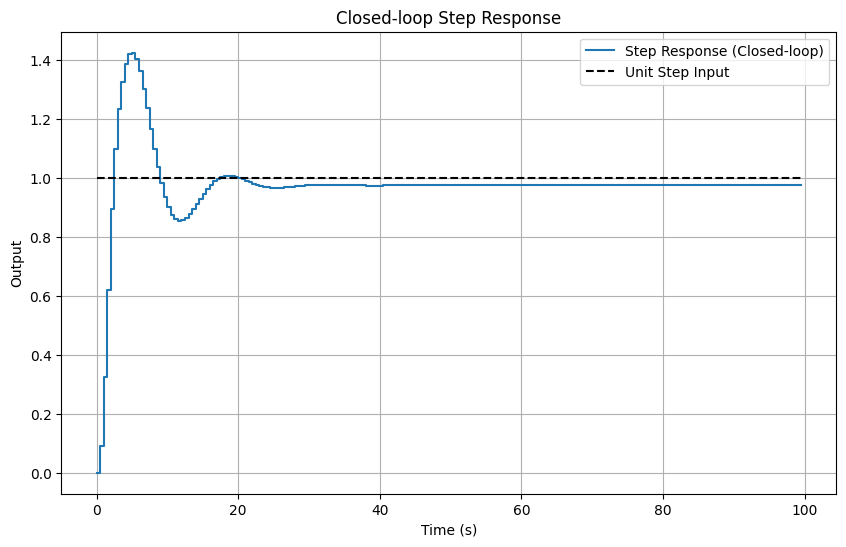

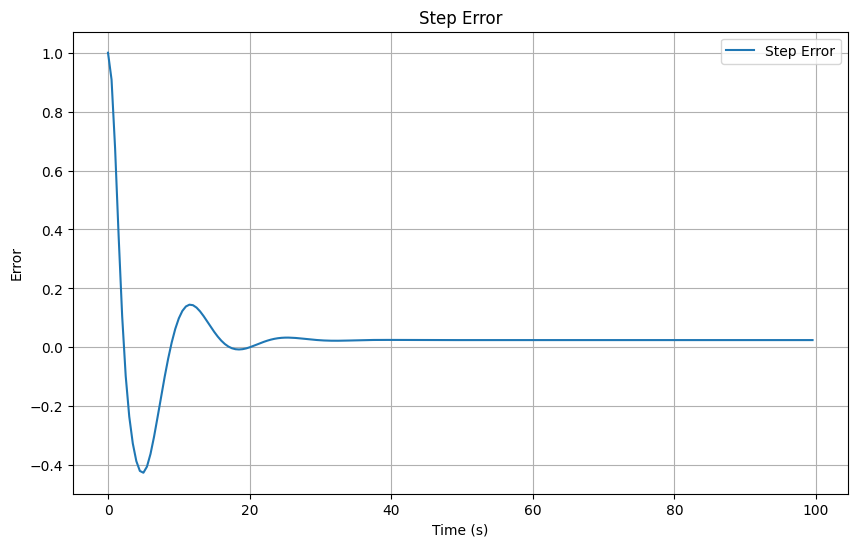

Steady-state error for ramp input: 0.0


/home/gian/.local/lib/python3.8/site-packages/control/timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


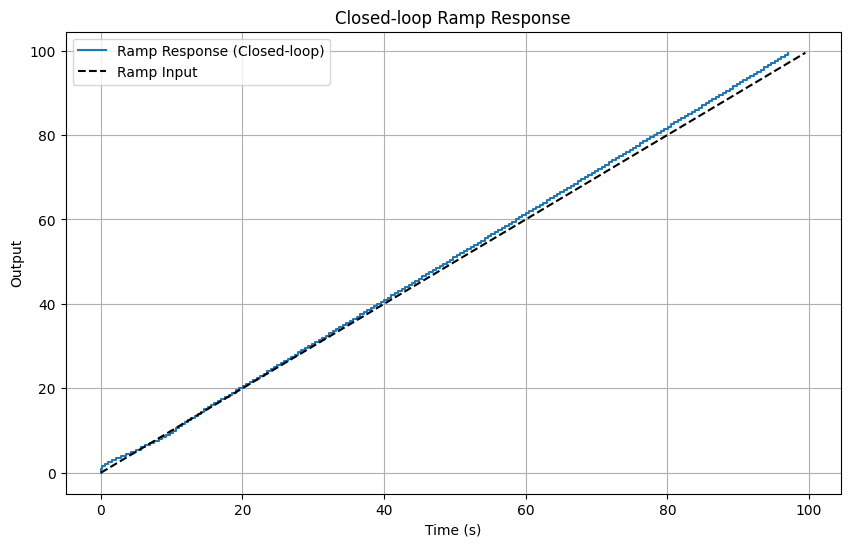

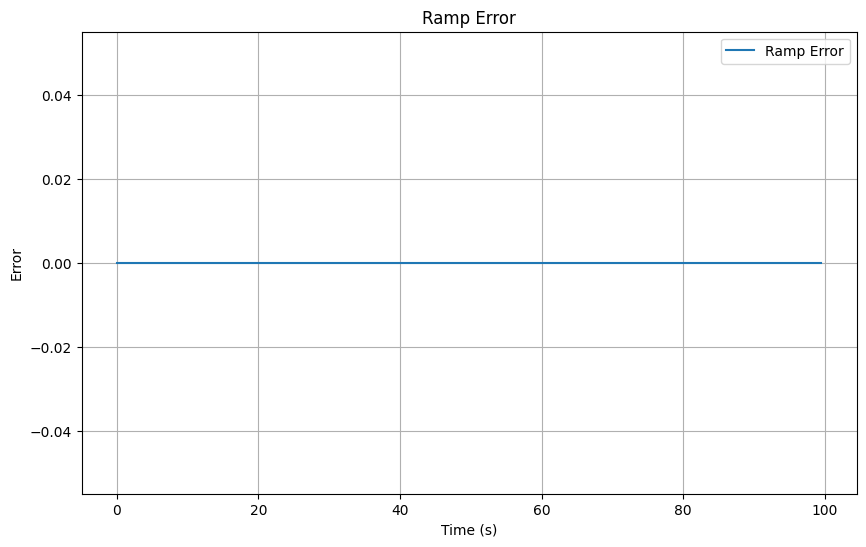

Steady-state error for parabolic input: 9362.375


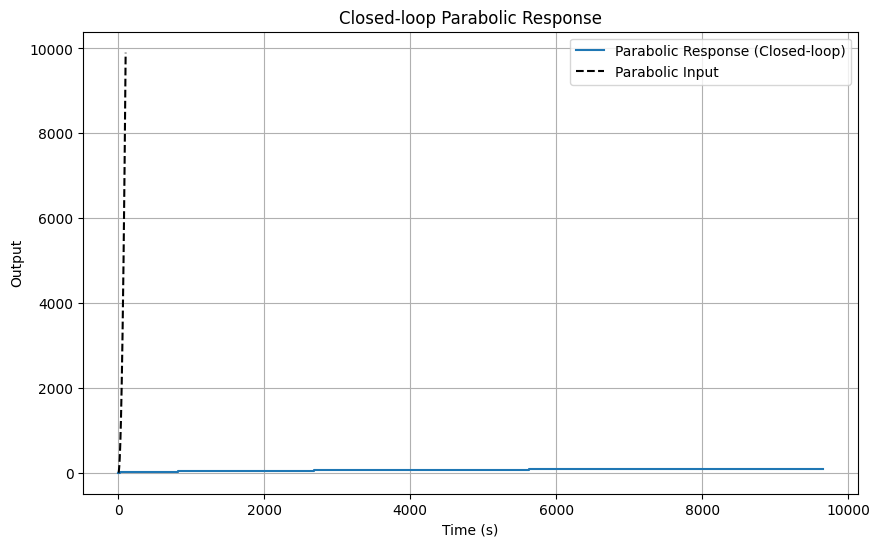

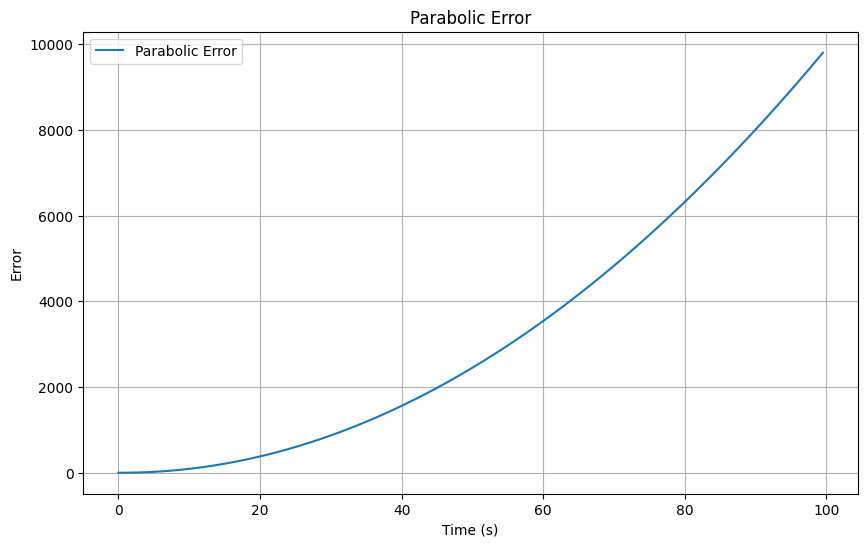

Poles of G(z): [0.99978882+0.03554858j 0.99978882-0.03554858j 0.32771118+0.5100942j
 0.32771118-0.5100942j ]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

# Sampling time and time vector
T = 0.5
td = np.arange(0, 100, T)

# Transfer function G(z)
num = [0.0912, -0.0012, -0.0544, 0]
den = [1, -2.655, 2.679, -1.391, 0.3679]
G = tf(num, den, T)

# Closed-loop transfer function with unity feedback
G_cl = feedback(G, 1)

# Step response of the closed-loop system
y_step, t_step = step(G_cl, td)
step_error = 1 - y_step
print("Steady-state error for step input:", np.mean(step_error[-10:]))

# Plot step response and error
plt.figure(figsize=(10, 6))
plt.step(td, y_step, where='post', label='Step Response (Closed-loop)')
plt.plot([0, max(td)], [1, 1], 'k--', label='Unit Step Input')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Closed-loop Step Response')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t_step, step_error, label='Step Error')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Step Error')
plt.legend()
plt.grid(True)
plt.show()

# Ramp response of the closed-loop system
ramp = td
t_ramp, y_ramp, _ = lsim(G_cl, U=ramp, T=td)
ramp_error = ramp - y_ramp
print("Steady-state error for ramp input:", np.mean(ramp_error[-10:]))

# Plot ramp response and error
plt.figure(figsize=(10, 6))
plt.step(t_ramp, y_ramp, where='post', label='Ramp Response (Closed-loop)')
plt.plot(td, ramp, 'k--', label='Ramp Input')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Closed-loop Ramp Response')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(td, ramp_error, label='Ramp Error')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Ramp Error')
plt.legend()
plt.grid(True)
plt.show()

# Parabolic response of the closed-loop system
parabola = td ** 2
t_parab, y_parab, _ = lsim(G_cl, U=parabola, T=td)
parabola_error = parabola - y_parab
print("Steady-state error for parabolic input:", np.mean(parabola_error[-10:]))

# Plot parabolic response and error
plt.figure(figsize=(10, 6))
plt.step(t_parab, y_parab, where='post', label='Parabolic Response (Closed-loop)')
plt.plot(td, parabola, 'k--', label='Parabolic Input')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Closed-loop Parabolic Response')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(td, parabola_error, label='Parabolic Error')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Parabolic Error')
plt.legend()
plt.grid(True)
plt.show()

# System poles
poles = np.roots(den)
print("Poles of G(z):", poles)

### Questão 2

Nessa atividade o objetivo é avaliar a região de factibilidade para o projeto de um controlador que atenda a certos critérios de desempenho.

Para isso, considere os polos dominantes de 2° ordem de um sistema em malha-fechada dado por:

$$
\frac{Y(s)}{R(s)} = \frac{\omega_n^2}{s^2 + 2\xi\omega_n s + \omega_n^2}
$$

Suponha que o sistema possa ter um sobressinal máximo de 10%, frequência amortecida $\omega_d \leq 2.5 \, \text{rad/s}$ e $\sigma = \xi \omega_n \geq 1$ com período de amostragem $T = 0.25$ s.

O código em Matlab a seguir apresenta um exemplo para avaliar, de forma gráfica, a região de factibilidade para os critérios de desempenho. Além do mais, o código também apresenta um conjunto de 100 soluções factíveis que atendem aos critérios.

```matlab
close all
clear all
clc
%%
Mp = 0.1;
xi_min = abs(log(Mp)/sqrt(pi^2+log(Mp)^2));
wd_max = 2.5;
sigma_max = 1;
T = 0.25;
dw = 0.001;
wn = 0:dw:4.5*pi;
xi = xi_min;
s1 = -xi*wn + 1j*wn*sqrt(1 - xi^2);
figure
subplot(131)
hold on
line([-1.2*pi 1.2*pi],[0 0],'linewidth',2,'color','black') % eixo real
line([0 0],[-1.2*pi 1.2*pi],'linewidth',2,'color','black') % eixo imag
sgrid
plot(real(s1),imag(s1),'LineWidth',2,'Color','red')
plot(real(s1),-imag(s1),'LineWidth',2,'Color','red')
wd = 0:dw:4*pi;
sigma = 1;
s2 = -sigma + 1j*wd;
plot(real(s2),imag(s2),'LineWidth',2,'Color','blue')
plot(real(s2),-imag(s2),'LineWidth',2,'Color','blue')
wd = wd_max;
sigma = 0:0.001:30;
s3 = -sigma + 1j*wd;
plot(real(s3),imag(s3),'LineWidth',2,'Color','green')
plot(real(s3),-imag(s3),'LineWidth',2,'Color','green')
xlim([-1.2*pi 1.2*pi])
ylim([-1.2*pi 1.2*pi])
subplot(132)
hold on
z1 = exp(s1*T);
z2 = exp(s2*T);
z3 = exp(s3*T);
line([-1.2 1.2],[0 0],'linewidth',2,'color','black') % eixo real
line([0 0],[-1.2 1.2],'linewidth',2,'color','black') % eixo imag
plot(real(z1),imag(z1),'LineWidth',2,'Color','red')
plot(real(z1),-imag(z1),'LineWidth',2,'Color','red')
plot(real(z2),imag(z2),'LineWidth',2,'Color','blue')
plot(real(z2),-imag(z2),'LineWidth',2,'Color','blue')
plot(real(z3),imag(z3),'LineWidth',2,'Color','green')
plot(real(z3),-imag(z3),'LineWidth',2,'Color','green')
zgrid
subplot(133)
hold on
line([0 10],[1+Mp 1+Mp],'linestyle','--','color','black')
%%
for N = 1:100
    sigma = 3 * rand; % xi*wn
    wd = 2.5 * rand; % wn*sqrt(1 - xi^2)
    xi = (sigma / wd) / sqrt(1 + sigma^2 / wd^2);
    wn = wd / xi;
    if -sigma <= -sigma_max && wd <= wd_max && xi >= xi_min
        figure(1)
        subplot(131)
        s = -sigma + 1j * wd;
        plot(real(s), imag(s), 'x', 'Color', 'c', 'LineWidth', 2)
        plot(real(s), -imag(s), 'x', 'Color', 'c', 'LineWidth', 2)
        subplot(132)
        z = exp(s * T);
        plot(real(z), imag(z), 'x', 'Color', 'c', 'LineWidth', 2)
        plot(real(z), -imag(z), 'x', 'Color', 'c', 'LineWidth', 2)
        subplot(133)
        G = tf([wn^2], [1 2 * xi * wn wn^2]);
        t = 0:0.001:10;
        y = step(G, t);
        plot(t, y)
        drawnow
    end
end
```

Repita o código de exemplo para um projeto de controlador com as seguintes especificações:

- Sobressinal: $M_p \leq 15%$
- Tempo de pico: $t_p \leq 0.5$ s
- Tempo de acomodação: $t_s \leq 3$ s (±2%)

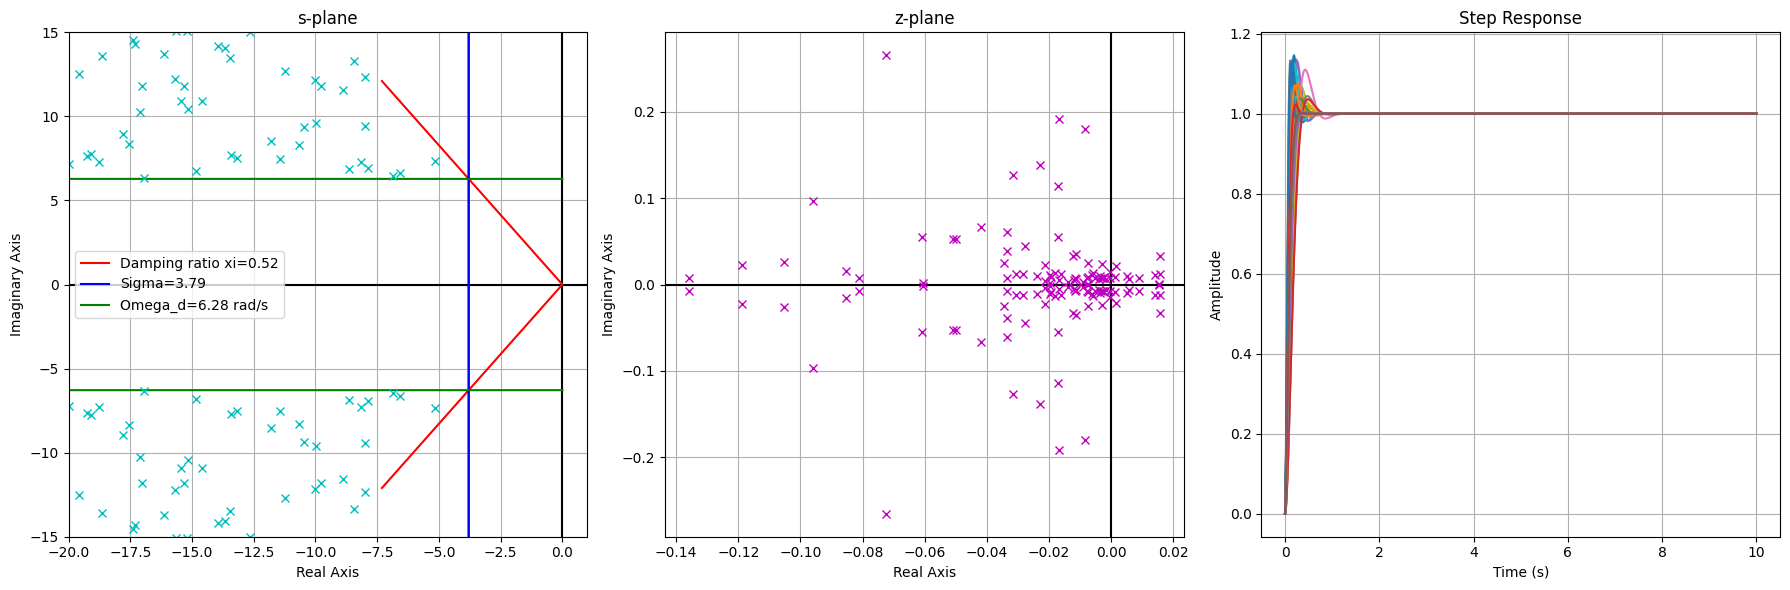

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

# Specifications
Mp = 0.15
xi_min = -np.log(Mp) / np.sqrt(np.pi**2 + (np.log(Mp))**2)
tp_max = 0.5  # seconds
ts_max = 3    # seconds
T = 0.25      # Sampling period

# Calculated constraints
wd_min = np.pi / tp_max             # Minimum damped natural frequency
sigma_min = 4 / ts_max              # Minimum sigma
omega_n_min = wd_min / np.sqrt(1 - xi_min**2)  # Minimum natural frequency
sigma_min = xi_min * omega_n_min    # Update sigma_min based on omega_n_min

dw = 0.001
wn = np.arange(0, 4.5 * np.pi, dw)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].set_title('s-plane')
axs[0].set_xlabel('Real Axis')
axs[0].set_ylabel('Imaginary Axis')
axs[0].grid(True)
axs[0].axhline(0, color='black')
axs[0].axvline(0, color='black')

# Damping ratio curve for xi_min
s1 = -xi_min * wn + 1j * wn * np.sqrt(1 - xi_min**2)
axs[0].plot(np.real(s1), np.imag(s1), 'r', label=f'Damping Ratio xi={xi_min:.2f}')
axs[0].plot(np.real(s1), -np.imag(s1), 'r')

# Sigma line for sigma_min
sigma_line = -sigma_min + 1j * np.linspace(-20, 20, len(wn))
axs[0].plot(np.real(sigma_line), np.imag(sigma_line), 'b', label=f'Sigma={sigma_min:.2f}')
axs[0].plot(np.real(sigma_line), -np.imag(sigma_line), 'b')

# Omega_d line for wd_min
omega_d_line = np.linspace(-20, 0, len(wn)) + 1j * wd_min
axs[0].plot(np.real(omega_d_line), np.imag(omega_d_line), 'g', label=f'Omega_d={wd_min:.2f} rad/s')
axs[0].plot(np.real(omega_d_line), -np.imag(omega_d_line), 'g')

axs[0].legend()
axs[0].set_xlim([-20, 1])
axs[0].set_ylim([-15, 15])

axs[1].set_title('z-plane')
axs[1].set_xlabel('Real Axis')
axs[1].set_ylabel('Imaginary Axis')
axs[1].grid(True)
axs[1].axhline(0, color='black')
axs[1].axvline(0, color='black')

axs[2].set_title('Step Responses')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].grid(True)

# Generate feasible solutions
for _ in range(100):
    # Generate random xi and sigma within constraints
    xi = xi_min + (0.99 - xi_min) * np.random.rand()
    sigma = sigma_min + (20 - sigma_min) * np.random.rand()
    
    # Calculate omega_n and omega_d
    omega_n = sigma / xi
    omega_d = omega_n * np.sqrt(1 - xi**2)
    
    # Calculate performance metrics
    tp = np.pi / omega_d
    ts = 4 / sigma
    
    # Check if the generated parameters meet the specifications
    if tp <= tp_max and ts <= ts_max:
        # Poles in s-plane
        s = -sigma + 1j * omega_d
        axs[0].plot(s.real, s.imag, 'cx')
        axs[0].plot(s.real, -s.imag, 'cx')
        
        # Poles in z-plane
        z = np.exp(s * T)
        axs[1].plot(z.real, z.imag, 'mx')
        axs[1].plot(z.real, -z.imag, 'mx')
        
        # Step response
        sys = tf([omega_n**2], [1, 2 * xi * omega_n, omega_n**2])
        t = np.linspace(0, 10, 1000)
        y, t = step(sys, T=t)
        axs[2].plot(t, y)
        
plt.tight_layout()
plt.show()

### Questão 3

Nessa atividade, o objetivo é usar os recursos computacionais do Matlab para projetar um controlador para um sistema LIT SISO via Emulação.

Para isso, considere a planta em tempo contínuo descrita por:

$$
G(s) = \frac{1}{s(s + 0.3)}
$$

Deseja-se projetar um controlador em tempo contínuo com a seguinte estrutura:

$$
C(s) = K \frac{s - a}{s - b}
$$

De tal forma que o sistema em malha fechada apresente sobressinal máximo de 16.3% ($M_p \leq 16.3\%$) e tempo de pico $t_p = 1$ s.

Uma forma de fazer o projeto para esse sistema é seguir os passos:

1. **Obtenção de $\xi$ e $\omega_n$**:  
   Supondo que a dinâmica do sistema em malha fechada siga os polos dominantes de 2° ordem, temos:  
   Como $M_p = 16.3\%$, obtemos:

   $$
   \xi = \frac{\ln(M_p)}{\sqrt{\pi^2 + \ln(M_p)^2}} = 0.5
   $$

   Como $t_p = 1$ s, a frequência amortecida é:

   $$
   \omega_d = \frac{\pi}{t_p} = \pi \, \text{rad/s}
   $$

   Portanto, a frequência natural é:

   $$
   \omega_n = \frac{\omega_d}{\sqrt{1 - \xi^2}} = 3.62 \, \text{rad/s}
   $$

2. **Escolha do tempo de amostragem**:  
   Como $\omega_d = \pi \, \text{rad/s}$, o período de oscilação amortecida do sistema é $T_d = \frac{2\pi}{\omega_d} = 2$ s. Portanto, é desejável um período de amostragem menor que 0.2 s (10x a frequência de oscilação do sistema).

3. **Polos dominantes**:  
   Sabendo que os polos para um sistema de 2° ordem padrão são dados por:

   $$
   s_{1,2} = -\xi \omega_n \pm j\omega_n \sqrt{1 - \xi^2}
   $$

   Para este exemplo:

   $$
   s_{1,2} = -1.81 \pm j\pi
   $$

   Para atender aos critérios de desempenho, o Lugar Geométrico das Raízes (LGR) do sistema compensado deve passar por esses polos.

4. **Sintonia do compensador**:  
   A sintonia do controlador consiste em encontrar os valores de $a$ e $b$ que satisfaçam os critérios de desempenho especificados para o sistema de controle. Isso pode ser feito analiticamente ou via algoritmos de otimização.

   Como existe um polo estável em $s = -0.3$, podemos escolher $a = -0.3$ para cancelar esse polo, resultando em:

   $$
   C(s)G(s) = K \frac{(s + 0.3)}{s - b} \frac{1}{s(s + 0.3)} = K \frac{1}{s(s - b)}
   $$

   Em malha fechada:

   $$
   \frac{Y(s)}{R(s)} = \frac{C(s)G(s)}{1 + C(s)G(s)} = \frac{K}{s^2 - bs + K}
   $$

   Conclui-se que:

   $$
   K = \omega_n^2 = 13.16, \quad b = -2\xi\omega_n = -3.62
   $$

   Portanto, o controlador resultante é:

   $$
   C(s) = 13.16 \frac{s + 0.3}{s + 3.62}
   $$

   Fazendo a discretização pelo método de mapeamento casado de polos e zeros com $T = 0.2$ s:

   $$
   C_d(z) = \frac{9.6416(z - 0.9418)}{z - 0.484}
   $$

   A equação a diferenças que implementa este controlador é:

   $$
   u[k] = 0.494u[k - 1] + 9.6416e[k] - 9.08e[k - 1]
   $$

O seguinte código em Matlab simula esse controlador para diferentes tempos de amostragem:

```matlab
close all
clear all
clc
%%
Mp = 0.163;
tp = 1;
s = tf('s');
G = 1/(s*(s + 0.3))
%%
xi = abs(abs(log(Mp) / sqrt(pi^2 + log(Mp)^2)))
wd = pi / tp
wn = wd / sqrt(1 - xi^2)
Td = 2 * pi / wd
fd = 1 / Td
fs = 10 * fd
Ts = 1 / fs
sigma = xi * wn
a = -0.3;
K = wn^2
b = -2 * sigma
%% Tempo contínuo
C = zpk(a, b, K)
figure
rlocus(C * G)
hold on
Gf = C * G / (1 + C * G);
p = pole(Gf)
plot(real(p), imag(p), 'xr', 'LineWidth', 2)
ylim([-4 4])
info = stepinfo(Gf)
dt = 0.0001;
t = 0:dt:10;
y = step(Gf, t);
figure
plot(t, y, 'LineWidth', 1.5)
hold on
%% Tempo discreto (emulação)
Ts = [0.2 0.1 0.01];
for i = 1:numel(Ts)
    Cd = c2d(C, Ts(i), 'matched');
    Gd = c2d(G, Ts(i), 'matched');
    Gfd = Cd * Gd / (1 + Cd * Gd);
    td = 0:Ts(i):10;
    info = stepinfo(Gfd)
    yd = step(Gfd, td);
    stairs(td, yd, 'LineWidth', 1.5)
end
line([0 max(t)], [1 1], 'color', 'black', 'linestyle', '--')
legend('Contínuo', 'Ts=0.2', 'Ts=0.1', 'Ts=0.01')
```

Usando a mesma estratégia descrita anteriormente, projete um controlador para a planta:

$$
G(s) = \frac{1}{s(s + 0.5)}
$$
​
Que garanta:
- $M_p \leq 12%$
- $t_p \leq 2$ s

Escolha um tempo de amostragem 10x menor que o tempo de oscilação amortecida do sistema e depois repita com tempos de amostragem cada vez menores.

O que pode-se concluir em relação ao comportamento em tempo discreto e tempo contínuo?

In [3]:
def step_info(t, y, SettlingTimeThreshold=0.02):
    """
    Computes step response characteristics.
    
    Parameters:
    - t: time array
    - y: response array
    - SettlingTimeThreshold: threshold for settling time (default is 2%)
    
    Returns:
    A dictionary containing rise time, settling time, overshoot, etc.
    """
    import numpy as np
    
    y_final = y[-1]
    y_initial = y[0]
    y_peak = np.max(y)
    y_undershoot = np.min(y)
    Overshoot = (y_peak - y_final) / (y_final - y_initial) * 100 if y_final != y_initial else 0
    Undershoot = (y_final - y_undershoot) / (y_final - y_initial) * 100 if y_final != y_initial else 0
    
    # Rise time 
    try:
        t_rise_start = t[np.where(y >= y_initial + 0.1 * (y_final - y_initial))[0][0]]
        t_rise_end = t[np.where(y >= y_initial + 0.9 * (y_final - y_initial))[0][0]]
        RiseTime = t_rise_end - t_rise_start
    except IndexError:
        RiseTime = np.nan
    
    # Settling time 
    SettlingIndices = np.where(np.abs(y - y_final) > SettlingTimeThreshold * np.abs(y_final - y_initial))[0]
    if len(SettlingIndices) > 0:
        SettlingTime = t[SettlingIndices[-1]]
    else:
        SettlingTime = 0
    
    # Peak time
    PeakTime = t[np.argmax(y)]
    
    info = {
        'RiseTime': RiseTime,
        'SettlingTime': SettlingTime,
        'SettlingMin': np.min(y),
        'SettlingMax': np.max(y),
        'Overshoot': Overshoot,
        'Undershoot': Undershoot,
        'Peak': y_peak,
        'PeakTime': PeakTime,
        'SteadyStateValue': y_final
    }
    
    return info

Damping Ratio (xi): 0.5594
Damped Natural Frequency (omega_d): 1.5708 rad/s
Natural Frequency (omega_n): 1.8951 rad/s
Sigma: 1.0601 rad/s
Damped Oscillation Period (Td): 4.0000 s
Sampling Times (Ts): [0.4, 0.2, 0.1, 0.05]
Controller Zero (a): -0.5
Controller Pole (b): -2.1203
Controller Gain (K): 3.5913

Continuous-Time System Step Info:
RiseTime: 0.9289999999999999
SettlingTime: 3.088
SettlingMin: 0.0
SettlingMax: 1.1200000000000165
Overshoot: 11.997213155961333
Undershoot: 100.0
Peak: 1.1200000000000165
PeakTime: 2.0
SteadyStateValue: 1.0000248831552303

Discrete-Time System with T = 0.400 s Step Info:
RiseTime: 0.8000000000000002
SettlingTime: 6.4
SettlingMin: 0.0
SettlingMax: 1.3845524224158168
Overshoot: 39.454767619147404
Undershoot: 100.0
Peak: 1.3845524224158168
PeakTime: 1.6
SteadyStateValue: 0.992832619532267

Discrete-Time System with T = 0.200 s Step Info:
RiseTime: 0.6
SettlingTime: 4.0
SettlingMin: 0.0
SettlingMax: 1.2041923469853935
Overshoot: 20.517783095834254
Undersho

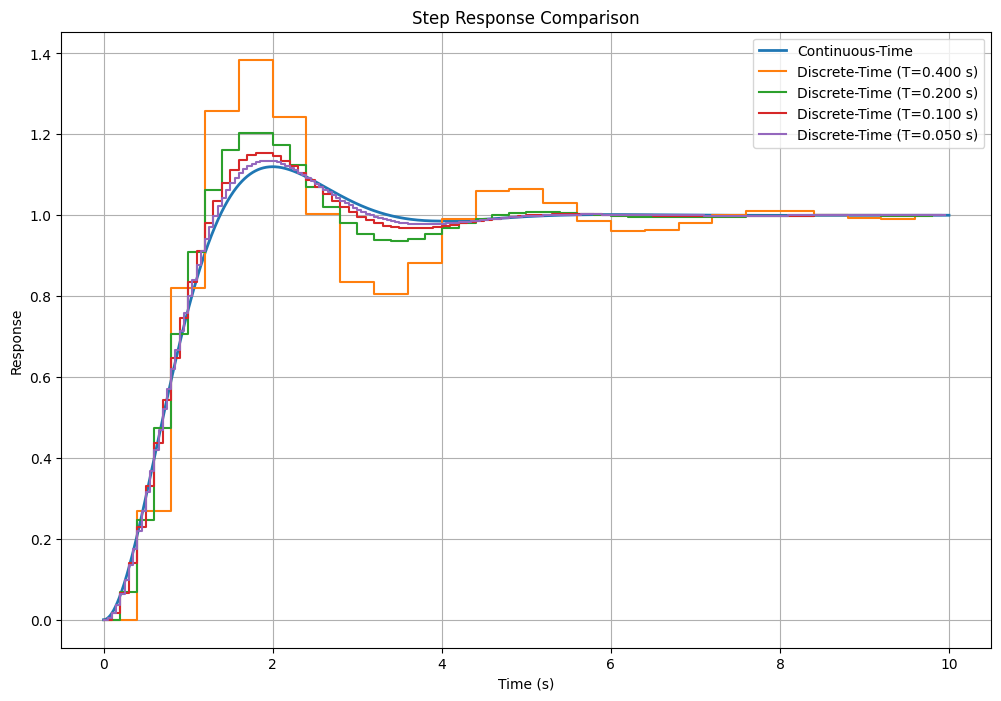

In [4]:
# Specifications
Mp = 0.12       # Maximum overshoot (12%)
tp = 2          # Peak time (seconds)

# Plant G(s)
s = tf('s')
G = 1 / (s * (s + 0.5))

# Step 3: Calculate xi and omega_n
xi = -np.log(Mp) / np.sqrt(np.pi**2 + (np.log(Mp))**2)
omega_d = np.pi / tp
omega_n = omega_d / np.sqrt(1 - xi**2)
sigma = xi * omega_n

print(f"Damping Ratio (xi): {xi:.4f}")
print(f"Damped Natural Frequency (omega_d): {omega_d:.4f} rad/s")
print(f"Natural Frequency (omega_n): {omega_n:.4f} rad/s")
print(f"Sigma: {sigma:.4f} rad/s")

# Step 4: Choose sampling times
Td = 2 * np.pi / omega_d
print(f"Damped Oscillation Period (Td): {Td:.4f} s")
Ts = [Td / 10, Td / 20, Td / 40, Td / 80]  # Sampling times
print("Sampling Times (Ts):", Ts)

# Step 5: Design the controller
a = -0.5                     # Zero of the controller
b = -2 * sigma               # Pole of the controller
K = omega_n**2               # Gain of the controller

print(f"Controller Zero (a): {a}")
print(f"Controller Pole (b): {b:.4f}")
print(f"Controller Gain (K): {K:.4f}")

# Continuous-time controller C(s)
C = K * (s - a) / (s - b)

# Continuous-time closed-loop system
Gf = feedback(C * G, 1)

# Time vector for continuous-time simulation
t_cont = np.arange(0, 10, 0.001)

# Step response of the continuous-time system
y_cont, t_cont = step(Gf, T=t_cont)

# Plot continuous-time response
plt.figure(figsize=(12, 8))
plt.plot(t_cont, y_cont, label='Continuous-Time', linewidth=2)

# Analyze step response characteristics
info_cont = step_info(t_cont, y_cont)
print("\nContinuous-Time System Step Info:")
for key, value in info_cont.items():
    print(f"{key}: {value}")

# Simulate for different sampling times
for T in Ts:
    # Discretize the controller and plant
    Cd = c2d(C, T, method='zoh')
    Gd = c2d(G, T, method='zoh')
    
    # Closed-loop discrete-time system
    Gfd = feedback(Cd * Gd, 1)
    
    # Time vector for discrete-time simulation
    t_disc = np.arange(0, 10, T)
    
    # Step response of the discrete-time system
    y_disc, t_disc = step(Gfd, T=t_disc)
    
    # Plot the discrete-time response
    plt.step(t_disc, y_disc, where='post', label=f'Discrete-Time (T={T:.3f} s)', linewidth=1.5)
    
    # Analyze step response characteristics
    info_disc = step_info(t_disc, y_disc)
    print(f"\nDiscrete-Time System with T = {T:.3f} s Step Info:")
    for key, value in info_disc.items():
        print(f"{key}: {value}")

# Plot settings
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response Comparison')
plt.legend()
plt.grid(True)
plt.show()